In [1]:
import sys
import numpy as np
import scipy as sp
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%pylab inline
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.utils.py3compat import annotate
from IPython.display import display
#from ipywidgets import FloatSlider
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
#sys.path.append

In [3]:
'''package fer.apr.DZ1;

import fer.apr.DZ2.HookeJeeves;

import java.io.*;
import java.util.*;

import java.util.Arrays;

/**
 * Created by Marija on 22.10.2016..
 */
 '''
import numpy as np

class Matrix:
    #private static double EPSILON = 1E-6;
    #int numberOfRows;
    #int numberOfColumns;
    #double[][] elements;

    def __init__(self, rowNumber, columnNumber, elements):
        self.numberOfRows = rowNumber
        self.numberOfColumns = columnNumber
        self.elements = elements
        print self.numberOfRows


    def getElements(self):
        return self.elements

    @staticmethod
    def printMatrix(a):
        #StringBuilder sb = new StringBuilder();
        #sb.append("[\n");
        outputString = "[\n"
        #for(int i = 0; i < a.numberOfRows; i ++){
        #print "a.getRowsCount() = " +str(a.getRowsCount())
        for i in range(a.getRowsCount()):
            outputString += "[ "
            for j in range(a.getColsCount()):
                #TODO gornji ili donji?
                # outputString += a.elements[i][j]
                outputString += str(a.elements[i,j])
                outputString += "\t"
            outputString += "]\n"

        outputString += "]\n"

        print outputString


    #pridruzivanje
    def makeEqualTo(self, B):
        self.numberOfColumns = B.getColsCount()
        self.numberOfRows = B.getRowsCount()
        self.elements = np.array(B.getElements())
        return B



    '''
    public void readFromTxt(String pathToFile) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(pathToFile));
        try {
            StringBuilder sb = new StringBuilder();
            String line = br.readLine();
            /*//String[] matrixRow = new String[];
            String[] matrixRowStringArray = line.trim().split("\\s+");
            double[] rowElements = new double[matrixRowStringArray.length];
            for(int i = 0; i < matrixRowStringArray.length; i++){
                rowElements[i] = Double.parseDouble(matrixRowStringArray[i]);
            }*/
            List<double[]> elementsArrayList = new ArrayList<double[]>();
            while (line != null) {
                //String[] matrixRow = new String[];
                String[] matrixRowStringArray = line.trim().split("\\s+");
                double[] rowElements = new double[matrixRowStringArray.length];
                for(int i = 0; i < matrixRowStringArray.length; i++){
                    rowElements[i] = Double.parseDouble(matrixRowStringArray[i]);
                }
                //imam redak [[el][el][el][el][el]]
                //double[][] arr = Arrays.copyOf(this.elements, this.elements.length + 1);
                //arr[this.elements.length] = rowElements;
                //this.elements = arr;

                elementsArrayList.add(rowElements);


                line = br.readLine();
            }

            elementsArrayList.toArray(this.elements);

        } finally {
            br.close();
        }
    }

    public void writeToTxt(String pathToFile) throws IOException{
        StringBuilder sb = new StringBuilder();
        for(int i = 0; i < numberOfRows; i++){
            for(int j = 0; j < numberOfColumns; j++){
                sb.append(this.elements[i][j]);
                sb.append("\t");
            }
            sb.append("\n");

        }
        //String everything = sb.toString();

        Writer writer = new BufferedWriter(new OutputStreamWriter(
                new FileOutputStream("matrix.out"), "UTF-8"));
        writer.write(sb.toString());
        writer.close();

    }

    public void writeToStdout(){
        for(int i = 0; i < numberOfRows; i++){
            for(int j = 0; j < numberOfColumns; j++){
                System.out.print(this.elements[i][j]);
                System.out.print("\t");
            }
            System.out.print("\n");
        }
    }
    '''

    def equals(self, obj):
        if (self == obj):
            return True
        if (obj == None):
            return False
        #TODO
        #if (getClass() != obj.getClass())
            #return false;
        #other = (Matrix)obj
        if self.getColsCount() != obj.getColsCount():
            return False
        #TODO
        #if (!Arrays.deepEquals(elements, other.elements))
            #return false;
        if self.getRowsCount() != self.getRowsCount():
            return False
        return True



    def getElement(self, row, column):
        if row >= self.getRowsCount() or column >= self.getColsCount():
            #throw new IndexOutOfBoundsException("Uneseni indeks je izvan opsega matrice.");
            print "Uneseni indeks je izvan opsega matrice."
        if (row < 0 or column < 0):
            #throw new IndexOutOfBoundsException("Indeks mora biti pozitivan broj.");
            print "Indeks mora biti pozitivan broj."
        test = self.elements[row,column]
        return self.elements[row,column]



    def setElement(self, row, column, value):
        if (row >= self.numberOfRows or column >= self.numberOfColumns):
            #throw new IndexOutOfBoundsException("Uneseni indeks je izvan opsega matrice.");
            print "Uneseni indeks je izvan opsega matrice."
        if (row < 0 or column < 0):
            #throw new IndexOutOfBoundsException("Indeks mora biti pozitivan broj.");
            print "Indeks mora biti pozitivan broj."
        self.elements[row, column] = value
        return self



    def getRowsCount(self):
        return self.numberOfRows


    def getColsCount(self):
        return self.numberOfColumns

    @staticmethod
    #TODO assert a i b?
    def add(a, b):
        if(a.numberOfColumns != b.numberOfColumns or a.numberOfRows != b.numberOfRows):
            print "Matrice nisu jednakih dimentija i ne mogu se zbrojiti."
            return None


        #double [][] resultElements = new double[a.numberOfRows][a.numberOfColumns];
        resultElements = np.empty([a.numberOfRows, a.numberOfColumns], dtype=np.float64)
        for i in range(a.numberOfRows):
            for j in range(a.numberOfColumns):
                #TODO gornji ili donji redak?
                #resultElements[i][j] = a.elements[i][j] + b.elements[i][j]
                resultElements[i,j] = a.elements[i,j] + b.elements[i,j]


        resultMatrix = Matrix(a.numberOfRows, a.numberOfColumns, resultElements)
        return resultMatrix

    @staticmethod
    def subtract(a, b):
        if(a.numberOfColumns != b.numberOfColumns or a.numberOfRows != b.numberOfRows):
            print "Matrice nisu jednakih dimentija i oduzimanje se ne moze provesti."
            return None

        resultElements = np.empty([a.numberOfRows,a.numberOfColumns], dtype = np.float64)
        for i in range(a.numberOfRows):
            for j in range (a.numberOfColumns):
                #TODO gornji ili donji
                #resultElements[i][j] = a.elements[i][j] - b.elements[i][j];
                resultElements[i,j] = a.elements[i,j] - b.elements[i,j]
        resultMatrix = Matrix(a.numberOfRows, a.numberOfColumns, resultElements)
        return resultMatrix

    def plusEquals(self, matrix):
        #if (self.getColsCount() != matrix.getColsCount() || this.getRowsCount() != matrix.getRowsCount())
            #throw new IncompatibleOperandException("Matrice su razlicitih dimenzija.");
        #for (int i = this.getRowsCount() - 1; i >= 0; --i)
        for i in range(self.getRowsCount() - 1, -1, -1):
            #for (int j = this.getColsCount() - 1; j >= 0; --j)
            for j in range(self.getColsCount() - 1, -1, -1):
                self.setElement(i, j, self.getElement(i, j) + matrix.getElement(i, j))
        return self

    def minusEquals(self, matrix):
        #if (self.getColsCount() != matrix.getColsCount() || this.getRowsCount() != matrix.getRowsCount())
            #throw new IncompatibleOperandException("Matrice su razlicitih dimenzija.");
        #for (int i = this.getRowsCount() - 1; i >= 0; --i)
        for i in range(self.getRowsCount() - 1, -1, -1):
            #for (int j = this.getColsCount() - 1; j >= 0; --j)
            for j in range(self.getColsCount() - 1, -1, -1):
                self.setElement(i, j, self.getElement(i, j) - matrix.getElement(i, j))
        return self


    def multiply(self, matrix):
        #if (self.getColsCount() != matrix.getColsCount() || this.getRowsCount() != matrix.getRowsCount())
            #throw new IncompatibleOperandException("Matrice su razlicitih dimenzija.");
        #for (int i = this.getRowsCount() - 1; i >= 0; --i)
        elements = np.empty([self.getRowsCount()][matrix.getColsCount()], dtype=np.float64)
        for i in range(self.getRowsCount() - 1, -1, -1):
            #for (int j = this.getColsCount() - 1; j >= 0; --j)
            for j in range(matrix.getColsCount() - 1, -1, -1):
                for k in range(matrix.getRowsCount() - 1, -1, -1):
                    elements[i,j] += self.getElement(i,k) * matrix.getElement(k,j)
        return Matrix(self.getRowsCount(), matrix.getColsCount(), elements)

    @staticmethod
    def multiply(a, b):
        if(a.numberOfColumns != b.numberOfRows):
            print "Matrice nisu kompatibilne za mnozenje."
            return None

        #double [][] resultElements = new double[a.numberOfRows][b.numberOfColumns];
        resultElements = np.empty([a.numberOfRows][b.numberOfColumns], dtype=np.float64)
        for i in range(a.numberOfRows):
            for j in range (b.numberOfColumns):
                resultElement = 0
                for k in range(a.numberOfColumns):
                    #TODO gornji ili donji?
                    # resultElement = resultElement + a.elements[i][k]*b.elements[k][j];
                    resultElement = resultElement + a.elements[i,k] * b.elements[k,j]
                #TODO
                resultElements[i,j] = resultElement
        resultMatrix = Matrix(a.numberOfRows, b.numberOfColumns, resultElements)
        return resultMatrix

    @staticmethod
    def scalarMultiply(matrix, scalar):
        #double[][] resultElements = new double[matrix.numberOfRows][matrix.numberOfColumns];
        resultElements = np.empty([matrix.numberOfRows,matrix.numberOfColumns], dtype=np.float64)
        for i in range(matrix.getRowsCount()):
            for j in range(matrix.getColsCount()):
                #TODO
                #resultElements[i][j] = matrix.elements[i][j] * scalar;
                resultElements[i,j] = matrix.elements[i,j] * scalar
        resultMatrix = Matrix(matrix.numberOfRows, matrix.numberOfColumns, resultElements)
        return resultMatrix

    @staticmethod
    def sanityCheck(d):
        EPSILON = 1E-6
        if((abs(round(d) - d) < EPSILON) and (abs(round(d) - d) != 0) ):
            print "Pojavila se vrijednost " + str(d) + " koja ima decimalno odstupanje od cijelog broja manje od epsilon = " + str(EPSILON) + ". Postavljam na " + str(round(d))
            return round(d)
        return d

    @staticmethod
    def copyPoint(point):
        '''copy = np.empty([point.getRowsCount()][point.getColsCount()], dtype= np.float64)
        for i in range(point.getRowsCount()):
            copy[i]=np.array(point.getElements()[i])

        copyMatrix = Matrix(point.getRowsCount(), point.getColsCount(), copy)
        return copyMatrix
        '''
        return Matrix(point.getRowsCount(), point.getColsCount(), np.array(point.getElements()))

    @staticmethod
    def forwardSubstitution(a, b):
        if(b.numberOfRows!=a.numberOfRows):
            print "Vektor b nije jednake dimenzije kao matrica, nije moguce provesti supstituciju unaprijed."
        resultB = Matrix(b.numberOfRows, b.numberOfColumns, np.array(b.elements))
        #double[][] resultElements = new double[b.numberOfRows][1];
        resultElements = np.empty([b.numberOfRows][1], dtype=np.float64)

        for i in range(a.numberOfRows - 1):
            for j in range(i + 1, a.numberOfRows, 1):
                #TODO
                #resultB.elements[j][0] = sanityCheck(resultB.elements[j][0] - a.elements[j][i]*resultB.elements[i][0]);
                resultB.elements[j,0] = Matrix.sanityCheck(resultB.elements[j,0] - a.elements[j,i] * resultB.elements[i,0])
        return resultB

    @staticmethod
    def backwardSupstitution(a, vector):
        if(vector.numberOfRows!=a.numberOfRows):
            print "Vektor y nije jednake dimenzije kao matrica, nije moguce provesti supstituciju unatrag."
        for i in range(a.numberOfRows-1, -1, -1):
            EPSILON = 1E-6
            if(abs(a.getElement(i, i))<EPSILON):
                print "Gornja trokutasta matrica na dijagonali sadrzi nulu. Nije moguce provesti supstituciju unatrag"
                return None
            vector.setElement(i, 0, Matrix.sanityCheck(vector.getElement(i, 0)/a.getElement(i,i)))
            for j in range(i):
                vector.setElement(j, 0, Matrix.sanityCheck(vector.getElement(j, 0)-a.getElement(j, i)*vector.getElement(i, 0)))
        #return new Matrica(1, vector.colSize(), vector.getElements());
        return vector

    @staticmethod
    def swapRowsOfMatrix(matrix, firstRow, secondRow):
        #TODO provjeri ispravnost
        tmp = matrix.elements[firstRow,:]
        matrix.elements[firstRow] = matrix.elements[secondRow,:]
        matrix.elements[secondRow,:] = tmp

    @staticmethod
    def lupDecomposition(a, permutationMatrix, lup):
        if (a.numberOfRows != a.numberOfColumns):
            #throw new IllegalArgumentException("Matrica mora biti kvadratna.");
            print "Matrica mora biti kvadratna."
        identityMatrixElements = Matrix.createIdentityMatrixElements(a.numberOfRows)
        workingMatrix = Matrix.copyPoint(a)
        Matrix.printMatrix(workingMatrix)
        for i in range(a.numberOfRows - 1):
            if (lup):
                #index = findMaxApsElement(workingMatrix, i, workingMatrix.elements[i][i])
                index = Matrix.findMaxApsElement(workingMatrix, i, workingMatrix.elements[i,i])
                if (index != i):
                    Matrix.swapRowsOfMatrix(permutationMatrix, i, index)
                    Matrix.swapRowsOfMatrix(workingMatrix, i, index)
                    print "Obavljamo mijenjanje redaka " + str(i) + " i " + str(index)
                    Matrix.printMatrix(workingMatrix)
            pivot = workingMatrix.getElement(i, i)
            if (pivot == 0):
                Matrix.printMatrix(workingMatrix)
                print "Pivot je jednak nuli - nije moguce provesti dekompoziciju"
                return None
            for j in range(i + 1, a.numberOfRows, 1):
                workingMatrix.setElement(j, i, Matrix.sanityCheck(workingMatrix.getElement(j, i) / float(pivot)))
                for k in range(i + 1,a.numberOfRows, 1):
                    workingMatrix.setElement(j, k, Matrix.sanityCheck(workingMatrix.getElement(j, k) - workingMatrix.getElement(j, i) * workingMatrix.getElement(i, k)))
            Matrix.printMatrix(workingMatrix);
        #TODO mozda vracati i working i permutacijsku?
        print "Vracam dekomponiranu matricu, a predana permutacijska matrica promijenjena je ako je bilo potrebno. Njome sada treba pomnoziti vektor b."
        return workingMatrix

    @staticmethod
    def createIdentityMatrixElements(n):
        elements = np.zeros((n,n), dtype=np.float64)
        for i in range(n):
            #TODO
            #elements[i][i] = 1;
            elements[i,i] = 1
        return elements

    @staticmethod
    def findMaxApsElement(matrix, startIndex, value):
        indexOfMax = startIndex
        max = value
        for i in range(startIndex, matrix.numberOfRows, 1):
            if (abs(matrix.getElement(i, startIndex)) > max):
                max = abs(matrix.getElement(i, startIndex))
                indexOfMax = i
        return indexOfMax

    @staticmethod
    def transpose(matrix):
        resultElements = np.empty([matrix.numberOfColumns,matrix.numberOfRows], dtype=np.float64)
        for i in range(matrix.numberOfRows):
            for j in range(matrix.numberOfColumns):
                #TODO
                #resultElements[j][i] = matrix.elements[i][j];
                resultElements[j,i] = matrix.elements[i,j]
        resultMatrix = Matrix(matrix.numberOfColumns, matrix.numberOfRows, resultElements)
        return resultMatrix

    @staticmethod
    def hasInverse(matrix):
        if(matrix.numberOfRows != matrix.numberOfColumns):
            print "Matrica nije kvadratna, nema inverz"
            return False
        determinant = Matrix.determinant(matrix)
        if(determinant == 0):
            print "Matrica je singularna, nema inverz"
            return False
        return True

    @staticmethod
    def determinant(matrix):
        '''return matrix.elements[0][0] * matrix.elements[1][1] * matrix.elements[2][2] +
                matrix.elements[0][1] * matrix.elements[1][2] * matrix.elements[2][0] +
                matrix.elements[0][2] * matrix.elements[1][0] * matrix.elements[2][1] -
                matrix.elements[2][0] * matrix.elements[1][1] * matrix.elements[0][2] -
                matrix.elements[2][1] * matrix.elements[1][2] * matrix.elements[0][0] -
                matrix.elements[2][2] * matrix.elements[1][0] * matrix.elements[0][1];
        '''
        return matrix.elements[0,0] * matrix.elements[1,1] * matrix.elements[2,2] + matrix.elements[0,1] * matrix.elements[1,2] * matrix.elements[2,0] + matrix.elements[0,2] * matrix.elements[1,0] * matrix.elements[2,1] - matrix.elements[2,0] * matrix.elements[1,1] * matrix.elements[0,2] - matrix.elements[2,1] * matrix.elements[1,2] * matrix.elements[0,0] - matrix.elements[2,2] * matrix.elements[1,0] * matrix.elements[0,1]

    @staticmethod
    def invert(matricaZaInvertirati):

        #Ax = prvi stupac jedinicne
        #=> x je prvi stupac invertirane, itd. za svaki stupac

        kopijaMatriceZaInvertirati = Matrix.copyPoint(matricaZaInvertirati)
        jedinicnaMatricaElements = Matrix.createIdentityMatrixElements(kopijaMatriceZaInvertirati.getRowsCount())#stvori jedinicnu matricu;
        jedinicnaMatrica = Matrix(kopijaMatriceZaInvertirati.getRowsCount(), kopijaMatriceZaInvertirati.getColsCount(), jedinicnaMatricaElements)

        dekomponirana = Matrix.lupDecomposition(kopijaMatriceZaInvertirati,jedinicnaMatrica,True)
        elementiKonacneInvertiraneMatrice = np.empty([matricaZaInvertirati.getColsCount(),matricaZaInvertirati.getRowsCount()], dtype= np.float64)

        for j in range(matricaZaInvertirati.getColsCount()):
            elementiIpsilona = np.empty([matricaZaInvertirati.getRowsCount(),1], dtype=np.float64)
            #TODO
            # elementiIpsilona[j][0] = 1;
            elementiIpsilona[j,0] = 1
            y = Matrix(matricaZaInvertirati.getRowsCount(), 1, elementiIpsilona)
            permutiraniY = Matrix.multiply(jedinicnaMatrica,y)
            ySupstituiranUnaprijed = Matrix.forwardSubstitution(dekomponirana, permutiraniY)
            ySupstituiranUnatrag = Matrix.backwardSupstitution(dekomponirana, ySupstituiranUnaprijed)

            for i in range(ySupstituiranUnatrag.getRowsCount()):
                #TODO
                #elementiKonacneInvertiraneMatrice[i][j] = ySupstituiranUnatrag.getElements()[i][0];
                elementiKonacneInvertiraneMatrice[i,j] = ySupstituiranUnatrag.getElements()[i,0]

        konacnaInvertiranaMatrica = Matrix(matricaZaInvertirati.getRowsCount(), matricaZaInvertirati.getColsCount(), elementiKonacneInvertiraneMatrice)
        return konacnaInvertiranaMatrica



In [4]:
class IFunction(object):

    def valueAt(self, *args):
        '''
        if isinstance(args[0], np.float64):
            self.__valueAtPoint(*args)
        elif isinstance(args[0], Matrix):
            self.__valueAtMatrix(*args)
        '''
        raise NotImplementedError

    def __valueAtPoint(self, point):
        raise NotImplementedError

    def __valueAtMatrix(self, point, t=None):
        raise NotImplementedError

    def valueAtDerivativeByX1(self, point):
        raise NotImplementedError

    def valueAtDerivativeByX2(self, point):
        raise NotImplementedError

    def valueAtDerivativeByX1ThenX1(self, point):
        raise NotImplementedError

    def valueAtDerivativeByX1ThenX2(self, point):
        raise NotImplementedError

    def valueAtDerivativeByX2ThenX1(self, point):
        raise NotImplementedError

    def getNumberOfCalls(self):
        raise NotImplementedError

class AbstractFunction(IFunction):

    def __init__(self):
        self.__counter = 0

    def increment(self):
        self.__counter =+ 1

    def getNumberOfCalls(self):
        return self.__counter

In [5]:
class F3OneDimensional(AbstractFunction):

    '''public F3OneDimensional() {
        super();
    }
    '''

    def __init__(self):
        #super.__init__()
        AbstractFunction.__init__(self)

    '''
    def valueAt(self, point):
        #super.increment()
        AbstractFunction.increment()
        #return Math.pow(point - 3, 2);
        return (point - 3)**2
    '''

    def valueAt(self, *args):
        # if isinstance(args[0], np.float64):
        #     return self.__valueAtPoint(*args)
        # elif isinstance(args[0], int):
        #     return self.__valueAtPoint(*args)
        # elif isinstance(args[0], Matrix):
        #     return self.__valueAtMatrix(*args)
        if isinstance(args[0], Matrix):
            return self.__valueAtMatrix(*args)
        else:
            return self.__valueAtPoint(*args)

    def __valueAtPoint(self, point):
        AbstractFunction.increment(self)
        return (point - 3) ** 2

    def __valueAtMatrix(self, point):
        if(point.getColsCount()!=1 and point.getRowsCount()!=1):
            raise ValueError("Tocka mora biti u jednodimenzijskom prostoru.")
        return F3OneDimensional.__valueAtPoint(self, point.getElement(0, 0))

    '''
    def valueAt(self, point, t):
        return 0
    '''

    def valueAtDerivativeByX1(self, point):
        return 0

    def valueAtDerivativeByX2(self, point):
        return 0

    def valueAtDerivativeByX1ThenX1(self, point):
        return 0

    def valueAtDerivativeByX1ThenX2(self, point):
        return 0

    def valueAtDerivativeByX2ThenX1(self, point):
        return 0

    def valueAtDerivativeByX2ThenX2(self, point):
        return 0

Povezivanje (jslink) dva widgeta - "play" widgeta i "slider" widgeta:

In [6]:
play = widgets.Play(
#     interval=10,
    value=50,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

Stvaranje polja x-vrijednosti koje su izlaz iz algoritma (jedna x-vrijednost = pronađena najbolja točka iz trenutne iteracije).

Također, inicijalizacija maksimalne vrijednosti do koje će widget "play" ići (maksimalna vrijednost widgeta = broj iteracija kroz koje je algoritam prošao)

In [7]:
inputFile = open('InteractiveOptimisationAlgorithms/HookeJeevesOutput.txt', 'r')
playMaxOfInterval = 0
poljeDobivenihBrojeva = []
for line in inputFile:
    print line
    playMaxOfInterval = playMaxOfInterval + 1
    #stvori polje ovih brojeva
    poljeDobivenihBrojeva.append(float(line))

8.0

5.0

1.0

4.0

2.02

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.01

3.

Funkcija za ispis y-vrijednosti za pripadnu x-vrijednost iz stvorenog polja (y-vrijednost = vrijednost funkcije cilja u pronađenoj najboljoj točki iz trenutne iteracije).

Jedan od ulaza funkcije je index polja s kojeg želimo pročitati točku, tj. broj iteracije koju želimo ispisati. Ovo će nam omogućiti da funkciju povežemo sa widgetom "slider" kojim ćemo birati iteraciju iz koje želimo saznati točke. Kasnije ćemo widget "slider" povezati s widgetom "play" (koji će iterirati po vrijednostima sliera) i time ćemo ostvariti funkcionalnost interaktivne animacije.

In [10]:
def f(poljeBrojeva, index):
    f3 = F3OneDimensional()
    yVrijednost = f3.valueAt(poljeBrojeva[index])
    print poljeBrojeva[index], yVrijednost

Uvjeravamo se da funkcija uistinu ispisuje y-vrijednosti uz pripadne x-vrijednosti, i da to uspješno povezujemo sa widgetom "slider":

In [11]:
interact(f, poljeBrojeva=fixed(poljeDobivenihBrojeva), index=widgets.IntSlider(min=0,max=playMaxOfInterval,step=1,value=0));

Widget kojeg smo koristili u prethodnoj naredbi sada ćemo spremiti u varijablu imena "w":

In [12]:
#w = interactive(f, poljeBrojeva=fixed(poljeDobivenihBrojeva), index=widgets.IntSlider(min=0,max=playMaxOfInterval,step=1,value=0))
w = widgets.IntSlider(min=0,max=playMaxOfInterval-1,step=1,value=0)

Uvjeravamo se da radi jednako kao i prije:

In [27]:
display(w)

In [28]:
w.keys

['_view_name',
 'style',
 'layout',
 'orientation',
 'msg_throttle',
 'min',
 '_range',
 'max',
 '_model_name',
 '_view_module',
 '_model_module_version',
 'value',
 'readout',
 'disabled',
 'step',
 'continuous_update',
 'readout_format',
 '_dom_classes',
 '_model_module',
 '_view_module_version',
 'description']

Stvaranje novog "play" widgeta. Ovaj počinje od nule, a ide do prethodno namještenog maksimuma (playMaxOfInterval). Također ga ponovno povezujemo sa sliderom "w".

In [17]:
play = widgets.Play(
     #interval=3,
    value=0,
    min=0,
    max=playMaxOfInterval,
    step=1,
    description="Press play",
    disabled=False
)
#slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (w, 'value'))
widgets.HBox([play, w])

In [18]:
interact(f, poljeBrojeva=fixed(poljeDobivenihBrojeva), index=w)

<function __main__.f>

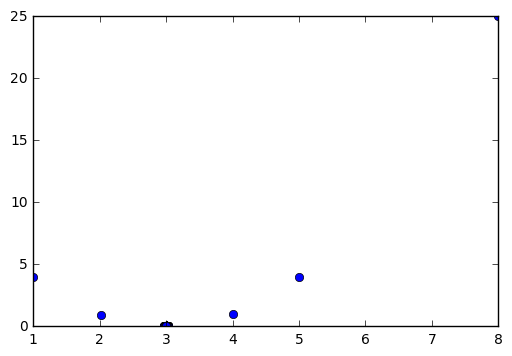

In [19]:
f3 = F3OneDimensional()
yValues = []
for i in range(len(poljeDobivenihBrojeva)):
    yValues.append(f3.valueAt(poljeDobivenihBrojeva[i]))
plt.plot(poljeDobivenihBrojeva, yValues, 'bo')

In [29]:
def f(poljeBrojeva, index):
    f3 = F3OneDimensional()
    yVrijednost = f3.valueAt(poljeBrojeva[index])
    plt.clf()
    plt.close('all')
    plt.figure(index)
    plt.axis([0.0,15.0, -5.0,30.0])
    ax = plt.gca()
    ax.set_autoscale_on(False)
    plt.plot(poljeBrojeva[index], yVrijednost, 'bo')
    plt.show()

In [30]:
interact(f, poljeBrojeva=fixed(poljeDobivenihBrojeva), index=w)

<function __main__.f>

Sada namještamo funkciju f da, na iste zahtjeve kao i prije, umjesto ispisivanja obavlja crtanje.

In [22]:
def f(poljeBrojeva, index):
    f3 = F3OneDimensional()
    yVrijednost = f3.valueAt(poljeBrojeva[index])
    plt.clf()
    plt.close('all')
    plt.figure(index)
    plt.axis([0.0,15.0, -5.0,30.0])
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    X = np.linspace(0.0, 13.0, num=10)
    
    plt.plot(X, [f3.valueAt(x) for x in X], 'b')
    plt.plot(poljeBrojeva[index], yVrijednost, 'ro')
    plt.show()

Potezanjem slidera, mijenja se nacrtana slika.

In [24]:
interact(f, poljeBrojeva=fixed(poljeDobivenihBrojeva), index=w)

<function __main__.f>

S obzirom na to da je widget "play" povezan sa sliderom "w", dovoljno ga je prikazati (display(play)) i na njemu pritisnuti gumb za pokretanje kako bi se na prethodnom grafu počele iscrtavati različite vrijednosti, tj. kako bi slika počela prikazivati jednu po jednu iteraciju algoritma.

In [25]:
display(play)

Ovime je ostvarena funkcionalnost interaktivne vizualizacije rada optimizacijskog algoritma kroz vrijeme.

In [20]:
x = [2, 3, 4, 5, 6, 7, 8]

In [21]:
y = [2, 3, 4, 5, 6, 7, 8]

In [22]:
play.keys

['_view_name',
 'interval',
 'layout',
 'description',
 'msg_throttle',
 'min',
 'max',
 '_model_name',
 '_view_module',
 '_model_module_version',
 'value',
 '_view_module_version',
 'disabled',
 'step',
 '_playing',
 '_dom_classes',
 '_model_module']